In [1]:
from dim_reduce import *

### Dimensionality Reduction Results: 

#### Pure LDA sepration

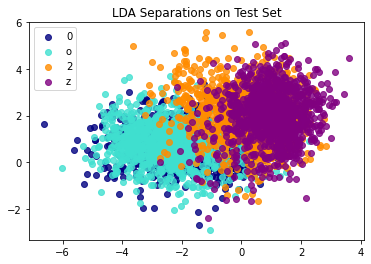

Demonstration ended. 


In [12]:
Symbols = "0o2z"
classes = [SymbolsToLabels(Sym) for Sym in Symbols]
LdaInstance = LDADimReduce()
Data, Labels = SplitbyClasses(classSize=1000, classes=classes)
# new data that never seemed before.
Embeddings = LdaInstance.getEmbeddings(Data);
colors = ['navy', 'turquoise', 'darkorange', "purple"]
SeparatingModes = [0, 5]
for color, II in zip(colors, classes):
    scatter(
        Embeddings[Labels == II, SeparatingModes[0]],
        Embeddings[Labels == II, SeparatingModes[1]],
        alpha=.8,
        color=color
    )
legend(list(Symbols))
title("LDA Separations on Test Set")
show()
print("Demonstration ended. ")

#### Pure PCA Separation


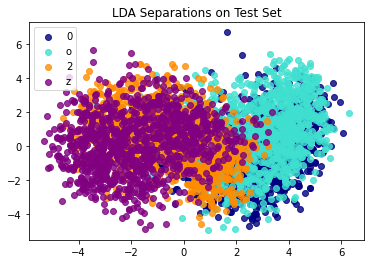

Demonstration ended. 


In [14]:
Symbols = "0o2z"
classes = [SymbolsToLabels(Sym) for Sym in Symbols]
LdaInstance = PCADimReduce()
Data, Labels = SplitbyClasses(classSize=1000, classes=classes)
# new data that never seemed before.
Embeddings = LdaInstance.getEmbeddings(Data);
colors = ['navy', 'turquoise', 'darkorange', "purple"]
SeparatingModes = [0, 5]
for color, II in zip(colors, classes):
    scatter(
        Embeddings[Labels == II, SeparatingModes[0]],
        Embeddings[Labels == II, SeparatingModes[1]],
        alpha=.8,
        color=color
    )
legend(list(Symbols))
title("LDA Separations on Test Set")
show()
print("Demonstration ended. ")

#### PCA + LDA Separations

Getting PCA Model...
Getting PCA Embeddings...
Train LDA on PCA Embeddings... 
Represent using PCA modes and then on LDA basis... 


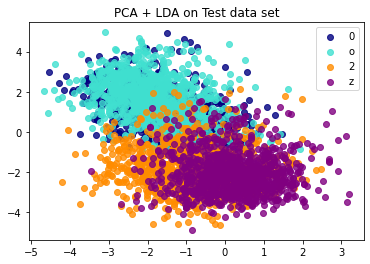

In [16]:
PCAInstance = PCADimReduce(n_components=0.8); print("Getting PCA Model...")
PCAEmbeddings = PCAInstance.getEmbeddings(); print("Getting PCA Embeddings...")
TrainLabels = PCAInstance.Labels
print("Train LDA on PCA Embeddings... ")
LDAMaxComponents = min(61, PCAInstance.PcaModel.n_components_ - 1)
LDAInstance = LDADimReduce(n_components=LDAMaxComponents,  # Just to be sure.
                           X=PCAEmbeddings,
                           y=TrainLabels)  # Use the PCA embeddings to train LDA

classes = [SymbolsToLabels(Char) for Char in "0o2z"]
TestData, TestLabels = SplitbyClasses(classSize=1000, classes=classes)
# Ge the LDA embeddings of the PCA embeddings.
print("Represent using PCA modes and then on LDA basis... ")
Embeddings = LDAInstance.getEmbeddings(PCAInstance.getEmbeddings(TestData))
colors = ['navy', 'turquoise', 'darkorange', "purple"]

## Plotting the Results
SeparatingModes = [0, 1]
for color, II in zip(colors, classes):
    scatter(
        Embeddings[TestLabels == II, SeparatingModes[0]],
        Embeddings[TestLabels == II, SeparatingModes[1]],
        alpha=.8,
        color=color
    )
legend(list("0o2z"))
title("PCA + LDA on Test data set")
show()

### SVM
* SVM trained on all equally sampled 62 symbols 
* SVM trained on the hardest to 2 symbols

### Decision Tree